### js加密、js混淆、js逆向机制
- https://www.aqistudy.cn/html/city_detail.html

- 分析
    - 1.点击查询条件后，点击查询按钮，捕获到两个一样的数据包，那我们需要破解其中一个的内容
        - 请求的url：https://www.aqistudy.cn/apinew/aqistudyapi.php
        - 请求方式：post
        - 请求参数：d：一组动态变化且加密的数据值
        - 返回的响应数据就是我们要捕获的空气指标数据
            - 响应数据也被加密，是一组被加密的密文数据，必须解密后才可以使用
    - 2.点击查询按钮后，发现页面没有全局刷新，表示点击查询按钮后发起的是ajax请求。
        - 发起的是ajax请求，就是我们要解析的数据包
        - 这个ajax请求发送之后请求：
            - 请求的url：https://www.aqistudy.cn/apinew/aqistudyapi.php
            - 请求方式：post
            - 请求参数：d：一组动态变化且加密的数据值
            - 返回的加密响应数据
        - 请求回来的数据是一组密文数据，在页面前台返回的是一组明文数据
            - 原因在于前台将响应回来的密文数据进行解密
                - 价值的信息：在该网站的相关数据包中存在解密方案，我们需要将解密方法获取到，对密文进行解密即可。
    - 3.点击查询按钮发起的是ajax请求，该请求在网站中一定是用js或者jquery写的，在ajax请求的代码中，可以看到那些具体的操作：
    - 请求的url
    - 请求的方式
        - 请求的url和请求方式可以从抓包工具中捕获
    - 携带的请求参数
        - 可以从ajax的代码中获取
        - 为什么请求参数不能再抓包工具中获取？
            - 因为该参数是动态变化且加密的
    - 请求回来的数据对应的回调函数
        - 函数的参数就是请求到的响应数据（加密的密文数据），该函数会对拿到的密文数据进行解密，将解密后的原文动态显示在前台页面上
    - 重点：只要能够找到点击按钮对应的ajax请求代码后，就能够拿到动态变化且加密的请求参数如何生成，那么可以将该方式动态生成一组请求参数，然后基于url进行请求发送，获取加密的响应数据。获取的密文数据可以通过ajax请求代码中的回调、匿名函数的操作中获取解密方案，使用该方案对加密的响应数据解密即可。

- 操作：找到ajax请求对应的代码
    - 方案一：获取搜索按钮对应的点击事件绑定的函数即可。
        - 最好使用火狐浏览器
        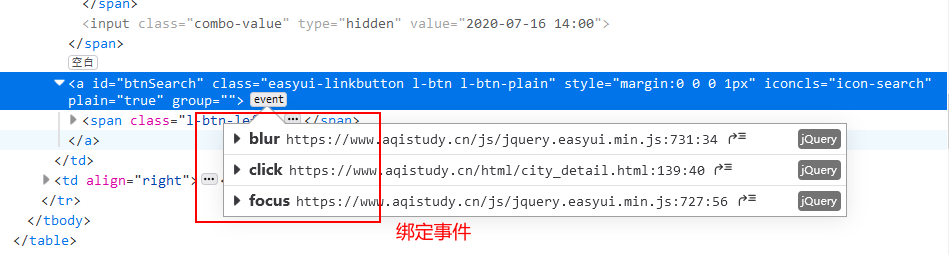
       


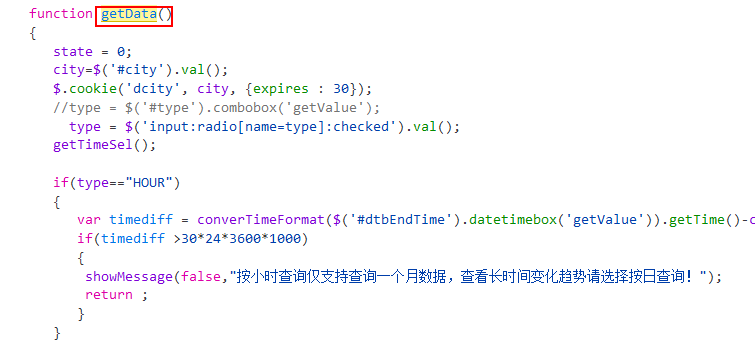

- 点击搜索按钮对应的点击事件函数名getData，接下来进入该函数内部，找到ajax请求代码
    - 找到getData函数的实现：
        - 没有发现ajax代码实现
        - 发现函数内部调用了另外两个函数 getAQIData(); getWeatherData();
        - ajax代码在上面两个函数中
        - 有用的信息：type=HOUR
    - 进入上述两个函数中，没有找到ajax函数实现：
        - 没有ajax代码
        - 调用了getServerData(),那么ajax代码一定存在该函数中
            - getServerData的参数：
                - method
                - param
                    - param.city = city;
                    - param.type = type;
                    - param.startTime = startTime;
                    - param.endTime = endTime;
                - 回调函数
                - 0.5
    - 全局搜索getServerData()
        - 函数实现需要在抓包工具进行全局搜索
        - 找到的结构看上去像是密文
        - js混淆：
            - 在网站后台，关键的重要的js函数为了保密，一般会对这些js函数进行混淆（加密），所以我们需要对js混淆的函数进行解密
        - 反混淆
            - https://www.bm8.com.cn/jsConfusion/

In [9]:
function getServerData(method, object, callback, period) {
        const key = hex_md5(method + JSON.stringify(object));
        const data = getDataFromLocalStorage(key, period);
        if (!data) {
            var param = getParam(method, object);
            $.ajax({
                url: '../apinew/aqistudyapi.php',
                data: {
                    d: param //加密且动态变化的请求数据
                },
                type: "post",
                // 
                success: function (data) {
                    data = decodeData(data);
                    obj = JSON.parse(data);
                    if (obj.success) {
                        if (period > 0) {
                            obj.result.time = new Date().getTime();
                            localStorageUtil.save(key, obj.result)
                        }
                        callback(obj.result)
                    } else {
                        console.log(obj.errcode, obj.errmsg)
                    }
                }
            })
        } else {
            callback(data)
        }
    }

SyntaxError: invalid syntax (<ipython-input-9-56ca5746e099>, line 1)

eval(function(p,a,c,k,e,d){e=function(c){return(c<a?"":e(parseInt(c/a)))+((c=c%a)>35?String.fromCharCode(c+29):c.toString(36))};if(!''.replace(/^/,String)){while(c--)d[e(c)]=k[c]||e(c);k=[function(e){return d[e]}];e=function(){return'\\w+'};c=1;};while(c--)if(k[c])p=p.replace(new RegExp('\\b'+e(c)+'\\b','g'),k[c]);return p;}('o 2f(){1K="3S+/=",G.5W=o(a){H c,d,e,f,g,h,i,b="",j=0;J(a=76(a);j<a.K;)c=a.Y(j++),d=a.Y(j++),e=a.Y(j++),f=c>>2,g=(3&c)<<4|d>>4,h=(15&d)<<2|e>>6,i=63&e,7b(d)?h=i=64:7b(e)&&(i=64),b=b+1K.1e(f)+1K.1e(g)+1K.1e(h)+1K.1e(i);I b},G.3p=o(a){H c,d,e,f,g,h,i,b="",j=0;J(a=a.5C(/[^A-bu-bt-9\\+\\/\\=]/g,"");j<a.K;)f=1K.2m(a.1e(j++)),g=1K.2m(a.1e(j++)),h=1K.2m(a.1e(j++)),i=1K.2m(a.1e(j++)),c=f<<2|g>>4,d=(15&g)<<4|h>>2,e=(3&h)<<6|i,b+=1b.Z(c),64!=h&&(b+=1b.Z(d)),64!=i&&(b+=1b.Z(e));I b=7c(b)},76=o(a){H b,c,d;J(a=a.5C(/\\r\\n/g,"\\n"),b="",c=0;c<a.K;c++)d=a.Y(c),1q>d?b+=1b.Z(d):d>by&&2j>d?(b+=1b.Z(8r|d>>6),b+=1b.Z(1q|63&d)):(b+=1b.Z(5L|d>>12),b+=1b.Z(1q|63&d>>6),b+=1b.Z(1q|63&d));I b},7c=o(a){J(H b="",c=0,d=c1=c2=0;c<a.K;)d=a.Y(c),1q>d?(b+=1b.Z(d),c++):d>bx&&5L>d?(c2=a.Y(c+1),b+=1b.Z((31&d)<<6|63&c2),c+=2):(c2=a.Y(c+1),c3=a.Y(c+2),b+=1b.Z((15&d)<<12|(63&c2)<<6|63&c3),c+=3);I b}}o 2n(a){I 67(2h(2I(a),a.K*1y))}o 7z(a){I 5G(2h(2I(a),a.K*1y))}o bw(a){I 68(2h(2I(a),a.K*1y))}o 7O(a,b){I 67(4l(a,b))}o 7D(a,b){I 5G(4l(a,b))}o bn(a,b){I 68(4l(a,b))}o 7E(){I"7y"==2n("7p")}o 2h(a,b){H c,d,e,f,g,h,i,j,k;J(a[b>>5]|=1q<<b%32,a[(b+64>>>9<<4)+14]=b,c=5H,d=-70,e=-6Z,f=5I,g=0;g<a.K;g+=16)h=c,i=d,j=e,k=f,c=S(c,d,e,f,a[g+0],7,-74),f=S(f,c,d,e,a[g+1],12,-73),e=S(e,f,c,d,a[g+2],17,6Y),d=S(d,e,f,c,a[g+3],22,-6U),c=S(c,d,e,f,a[g+4],7,-6T),f=S(f,c,d,e,a[g+5],12,6S),e=S(e,f,c,d,a[g+6],17,-6X),d=S(d,e,f,c,a[g+7],22,-6W),c=S(c,d,e,f,a[g+8],7,6V),f=S(f,c,d,e,a[g+9],12,-7g),e=S(e,f,c,d,a[g+10],17,-7f),d=S(d,e,f,c,a[g+11],22,-7e),c=S(c,d,e,f,a[g+12],7,7j),f=S(f,c,d,e,a[g+13],12,-7i),e=S(e,f,c,d,a[g+14],17,-7h),d=S(d,e,f,c,a[g+15],22,6C),c=N(c,d,e,f,a[g+1],5,-6z),f=N(f,c,d,e,a[g+6],9,-6y),e=N(e,f,c,d,a[g+11],14,6x),d=N(d,e,f,c,a[g+0],20,-6L),c=N(c,d,e,f,a[g+5],5,-6N),f=N(f,c,d,e,a[g+10],9,6Q),e=N(e,f,c,d,a[g+15],14,-6O),d=N(d,e,f,c,a[g+4],20,-6F),c=N(c,d,e,f,a[g+9],5,6E),f=N(f,c,d,e,a[g+14],9,-6D),e=N(e,f,c,d,a[g+3],14,-6G),d=N(d,e,f,c,a[g+8],20,6J),c=N(c,d,e,f,a[g+13],5,-7Z),f=N(f,c,d,e,a[g+2],9,-7Y),e=N(e,f,c,d,a[g+7],14,7X),d=N(d,e,f,c,a[g+12],20,-81),c=O(c,d,e,f,a[g+5],4,-84),f=O(f,c,d,e,a[g+8],11,-83),e=O(e,f,c,d,a[g+11],16,82),d=O(d,e,f,c,a[g+14],23,-7W),c=O(c,d,e,f,a[g+1],4,-7R),f=O(f,c,d,e,a[g+4],11,7Q),e=O(e,f,c,d,a[g+7],16,-7P),d=O(d,e,f,c,a[g+10],23,-7S),c=O(c,d,e,f,a[g+13],4,7V),f=O(f,c,d,e,a[g+0],11,-7U),e=O(e,f,c,d,a[g+3],16,-7T),d=O(d,e,f,c,a[g+6],23,85),c=O(c,d,e,f,a[g+9],4,-8h),f=O(f,c,d,e,a[g+12],11,-8f),e=O(e,f,c,d,a[g+15],16,8i),d=O(d,e,f,c,a[g+2],23,-8l),c=P(c,d,e,f,a[g+0],6,-8j),f=P(f,c,d,e,a[g+7],10,86),e=P(e,f,c,d,a[g+14],15,-8b),d=P(d,e,f,c,a[g+5],21,-7t),c=P(c,d,e,f,a[g+12],6,7s),f=P(f,c,d,e,a[g+3],10,-7m),e=P(e,f,c,d,a[g+10],15,-7K),d=P(d,e,f,c,a[g+1],21,-7H),c=P(c,d,e,f,a[g+8],6,7G),f=P(f,c,d,e,a[g+15],10,-7F),e=P(e,f,c,d,a[g+6],15,-7C),d=P(d,e,f,c,a[g+13],21,79),c=P(c,d,e,f,a[g+4],6,-7o),f=P(f,c,d,e,a[g+11],10,-7k),e=P(e,f,c,d,a[g+2],15,7r),d=P(d,e,f,c,a[g+9],21,-8d),c=1k(c,h),d=1k(d,i),e=1k(e,j),f=1k(f,k);I 1z(c,d,e,f)}o 1J(a,b,c,d,e,f){I 1k(5B(1k(1k(b,a),1k(d,f)),e),c)}o S(a,b,c,d,e,f,g){I 1J(b&c|~b&d,a,b,e,f,g)}o N(a,b,c,d,e,f,g){I 1J(b&d|c&~d,a,b,e,f,g)}o O(a,b,c,d,e,f,g){I 1J(b^c^d,a,b,e,f,g)}o P(a,b,c,d,e,f,g){I 1J(c^(b|~d),a,b,e,f,g)}o 4l(a,b){H d,e,f,g,c=2I(a);J(c.K>16&&(c=2h(c,a.K*1y)),d=1z(16),e=1z(16),f=0;16>f;f++)d[f]=bm^c[f],e[f]=bl^c[f];I g=2h(d.1P(2I(b)),1U+b.K*1y),2h(e.1P(g),8s)}o 1k(a,b){H c=(2B&a)+(2B&b),d=(a>>16)+(b>>16)+(c>>16);I d<<16|2B&c}o 5B(a,b){I a<<b|a>>>32-b}o 2I(a){H d,b=1z(),c=(1<<1y)-1;J(d=0;d<a.K*1y;d+=1y)b[d>>5]|=(a.Y(d/1y)&c)<<d%32;I b}o 68(a){H d,b="",c=(1<<1y)-1;J(d=0;d<32*a.K;d+=1y)b+=1b.Z(a[d>>5]>>>d%32&c);I b}o 67(a){H d,b=2M?"6P":"7l",c="";J(d=0;d<4*a.K;d++)c+=b.1e(15&a[d>>2]>>8*(d%4)+4)+b.1e(15&a[d>>2]>>8*(d%4));I c}o 5G(a){H d,e,f,b="3S+/",c="";J(d=0;d<4*a.K;d+=3)J(e=(L&a[d>>2]>>8*(d%4))<<16|(L&a[d+1>>2]>>8*((d+1)%4))<<8|L&a[d+2>>2]>>8*((d+2)%4),f=0;4>f;f++)c+=8*d+6*f>32*a.K?2L:b.1e(63&e>>6*(3-f));I c}o bq(a){H b=1c 2f;I b.5W(a)}o bp(){H b,a=2R;J(b=0;b<5w.K;b++)a+=5w[b];I a=a.5C(/\\s/g,""),2n(a)}o bI(a){H b=1c 2f;I b.3p(b.3p(b.3p(a)))}H 2M=0,2L="",1y=8,2R="bG";H 2M=0;H 2L="";o 2n(s){I 6f(4i(1H(s)))}o 7z(s){I 5M(4i(1H(s)))}o bM(s,e){I 6b(4i(1H(s)),e)}o 7O(k,d){I 6f(4h(1H(k),1H(d)))}o 7D(k,d){I 5M(4h(1H(k),1H(d)))}o bB(k,d,e){I 6b(4h(1H(k),1H(d)),e)}o 7E(){I 2n("7p").bz()=="7y"}o 4i(s){I 5U(3n(5v(s),s.K*8))}o 4h(U,X){H 2O=5v(U);V(2O.K>16)2O=3n(2O,U.K*8);H 6v=1z(16),6g=1z(16);J(H i=0;i<16;i++){6v[i]=2O[i]^bF;6g[i]=2O[i]^bE}H 6A=3n(6v.1P(5v(X)),1U+X.K*8);I 5U(3n(6g.1P(6A),1U+1q))}o 6f(Q){5u{2M}5x(e){2M=0}H 6u=2M?"6P":"7l";H T="";H x;J(H i=0;i<Q.K;i++){x=Q.Y(i);T+=6u.1e((x>>>4)&5Q)+6u.1e(x&5Q)}I T}o 5M(Q){5u{2L}5x(e){2L=\'\'}H 6I="3S+/";H T="";H 1Q=Q.K;J(H i=0;i<1Q;i+=3){H 6K=(Q.Y(i)<<16)|(i+1<1Q?Q.Y(i+1)<<8:0)|(i+2<1Q?Q.Y(i+2):0);J(H j=0;j<4;j++){V(i*8+j*6>Q.K*8)T+=2L;1A T+=6I.1e((6K>>>6*(3-j))&2c)}}I T}o 6b(Q,5i){H 5S=5i.K;H i,j,q,x,2J;H 2K=1z(2e.3X(Q.K/2));J(i=0;i<2K.K;i++){2K[i]=(Q.Y(i*2)<<8)|Q.Y(i*2+1)}H 69=2e.3X(Q.K*8/(2e.4F(5i.K)/2e.4F(2)));H 5k=1z(69);J(j=0;j<69;j++){2J=1z();x=0;J(i=0;i<2K.K;i++){x=(x<<16)+2K[i];q=2e.7q(x/5S);x-=q*5S;V(2J.K>0||q>0)2J[2J.K]=q}5k[j]=x;2K=2J}H T="";J(i=5k.K-1;i>=0;i--)T+=5i.1e(5k[i]);I T}o 1H(Q){H T="";H i=-1;H x,y;b2(++i<Q.K){x=Q.Y(i);y=i+1<Q.K?Q.Y(i+1):0;V(b5<=x&&x<=b4&&b3<=y&&y<=aU){x=aT+((x&78)<<10)+(y&78);i++}V(x<=aV)T+=1b.Z(x);1A V(x<=aY)T+=1b.Z(aX|((x>>>6)&aW),2a|(x&2c));1A V(x<=5t)T+=1b.Z(bf|((x>>>12)&5Q),2a|((x>>>6)&2c),2a|(x&2c));1A V(x<=bd)T+=1b.Z(bg|((x>>>18)&bj),2a|((x>>>12)&2c),2a|((x>>>6)&2c),2a|(x&2c))}I T}o bi(Q){H T="";J(H i=0;i<Q.K;i++)T+=1b.Z(Q.Y(i)&2N,(Q.Y(i)>>>8)&2N);I T}o bh(Q){H T="";J(H i=0;i<Q.K;i++)T+=1b.Z((Q.Y(i)>>>8)&2N,Q.Y(i)&2N);I T}o 5v(Q){H T=1z(Q.K>>2);J(H i=0;i<T.K;i++)T[i]=0;J(H i=0;i<Q.K*8;i+=8)T[i>>5]|=(Q.Y(i/8)&2N)<<(i%32);I T}o 5U(Q){H T="";J(H i=0;i<Q.K*32;i+=8)T+=1b.Z((Q[i>>5]>>>(i%32))&2N);I T}o 3n(x,1Q){x[1Q>>5]|=2a<<((1Q)%32);x[(((1Q+64)>>>9)<<4)+14]=1Q;H a=5H;H b=-70;H c=-6Z;H d=5I;J(H i=0;i<x.K;i+=16){H 89=a;H 8e=b;H 8k=c;H 8g=d;a=S(a,b,c,d,x[i+0],7,-74);d=S(d,a,b,c,x[i+1],12,-73);c=S(c,d,a,b,x[i+2],17,6Y);b=S(b,c,d,a,x[i+3],22,-6U);a=S(a,b,c,d,x[i+4],7,-6T);d=S(d,a,b,c,x[i+5],12,6S);c=S(c,d,a,b,x[i+6],17,-6X);b=S(b,c,d,a,x[i+7],22,-6W);a=S(a,b,c,d,x[i+8],7,6V);d=S(d,a,b,c,x[i+9],12,-7g);c=S(c,d,a,b,x[i+10],17,-7f);b=S(b,c,d,a,x[i+11],22,-7e);a=S(a,b,c,d,x[i+12],7,7j);d=S(d,a,b,c,x[i+13],12,-7i);c=S(c,d,a,b,x[i+14],17,-7h);b=S(b,c,d,a,x[i+15],22,6C);a=N(a,b,c,d,x[i+1],5,-6z);d=N(d,a,b,c,x[i+6],9,-6y);c=N(c,d,a,b,x[i+11],14,6x);b=N(b,c,d,a,x[i+0],20,-6L);a=N(a,b,c,d,x[i+5],5,-6N);d=N(d,a,b,c,x[i+10],9,6Q);c=N(c,d,a,b,x[i+15],14,-6O);b=N(b,c,d,a,x[i+4],20,-6F);a=N(a,b,c,d,x[i+9],5,6E);d=N(d,a,b,c,x[i+14],9,-6D);c=N(c,d,a,b,x[i+3],14,-6G);b=N(b,c,d,a,x[i+8],20,6J);a=N(a,b,c,d,x[i+13],5,-7Z);d=N(d,a,b,c,x[i+2],9,-7Y);c=N(c,d,a,b,x[i+7],14,7X);b=N(b,c,d,a,x[i+12],20,-81);a=O(a,b,c,d,x[i+5],4,-84);d=O(d,a,b,c,x[i+8],11,-83);c=O(c,d,a,b,x[i+11],16,82);b=O(b,c,d,a,x[i+14],23,-7W);a=O(a,b,c,d,x[i+1],4,-7R);d=O(d,a,b,c,x[i+4],11,7Q);c=O(c,d,a,b,x[i+7],16,-7P);b=O(b,c,d,a,x[i+10],23,-7S);a=O(a,b,c,d,x[i+13],4,7V);d=O(d,a,b,c,x[i+0],11,-7U);c=O(c,d,a,b,x[i+3],16,-7T);b=O(b,c,d,a,x[i+6],23,85);a=O(a,b,c,d,x[i+9],4,-8h);d=O(d,a,b,c,x[i+12],11,-8f);c=O(c,d,a,b,x[i+15],16,8i);b=O(b,c,d,a,x[i+2],23,-8l);a=P(a,b,c,d,x[i+0],6,-8j);d=P(d,a,b,c,x[i+7],10,86);c=P(c,d,a,b,x[i+14],15,-8b);b=P(b,c,d,a,x[i+5],21,-7t);a=P(a,b,c,d,x[i+12],6,7s);d=P(d,a,b,c,x[i+3],10,-7m);c=P(c,d,a,b,x[i+10],15,-7K);b=P(b,c,d,a,x[i+1],21,-7H);a=P(a,b,c,d,x[i+8],6,7G);d=P(d,a,b,c,x[i+15],10,-7F);c=P(c,d,a,b,x[i+6],15,-7C);b=P(b,c,d,a,x[i+13],21,79);a=P(a,b,c,d,x[i+4],6,-7o);d=P(d,a,b,c,x[i+11],10,-7k);c=P(c,d,a,b,x[i+2],15,7r);b=P(b,c,d,a,x[i+9],21,-8d);a=1k(a,89);b=1k(b,8e);c=1k(c,8k);d=1k(d,8g)}I 1z(a,b,c,d)}o 1J(q,a,b,x,s,t){I 1k(5B(1k(1k(a,q),1k(x,t)),s),b)}o S(a,b,c,d,x,s,t){I 1J((b&c)|((~b)&d),a,b,x,s,t)}o N(a,b,c,d,x,s,t){I 1J((b&d)|(c&(~d)),a,b,x,s,t)}o O(a,b,c,d,x,s,t){I 1J(b^c^d,a,b,x,s,t)}o P(a,b,c,d,x,s,t){I 1J(c^(b|(~d)),a,b,x,s,t)}o 1k(x,y){H 6p=(x&5t)+(y&5t);H 7a=(x>>16)+(y>>16)+(6p>>16);I(7a<<16)|(6p&5t)}o 5B(6n,6q){I(6n<<6q)|(6n>>>(32-6q))}H M=M||o(h,r){H k={},l=k.1W={},n=o(){},f=l.7d={R:o(a){n.6s=G;H b=1c n;a&&b.3x(a);b.6t("1g")||(b.1g=o(){b.s.1g.66(G,5w)});b.1g.6s=b;b.s=G;I b},1m:o(){H a=G.R();a.1g.66(a,5w);I a},1g:o(){},3x:o(a){J(H b cB a)a.6t(b)&&(G[b]=a[b]);a.6t("1h")&&(G.1h=a.1h)},1L:o(){I G.1g.6s.R(G)}},j=l.2Z=f.R({1g:o(a,b){a=G.1f=a||[];G.1i=b!=r?b:4*a.K},1h:o(a){I(a||s).1w(G)},1P:o(a){H b=G.1f,d=a.1f,c=G.1i;a=a.1i;G.6o();V(c%4)J(H e=0;e<a;e++)b[c+e>>>2]|=(d[e>>>2]>>>24-8*(e%4)&L)<<24-8*((c+e)%4);1A V(2B<d.K)J(e=0;e<a;e+=4)b[c+e>>>2]=d[e>>>2];1A b.1V.66(b,d);G.1i+=a;I G},6o:o(){H a=G.1f,b=G.1i;a[b>>>2]&=bU<<32-8*(b%4);a.K=h.3X(b/4)},1L:o(){H a=f.1L.1a(G);a.1f=G.1f.1R(0);I a},6r:o(a){J(H b=[],d=0;d<a;d+=4)b.1V(5D*h.6r()|0);I 1c j.1g(b,a)}}),m=k.1v={},s=m.bX={1w:o(a){H b=a.1f;a=a.1i;J(H d=[],c=0;c<a;c++){H e=b[c>>>2]>>>24-8*(c%4)&L;d.1V((e>>>4).1h(16));d.1V((e&15).1h(16))}I d.6l("")},1j:o(a){J(H b=a.K,d=[],c=0;c<b;c+=2)d[c>>>3]|=c0(a.1O(c,2),16)<<24-4*(c%8);I 1c j.1g(d,b/2)}},p=m.bZ={1w:o(a){H b=a.1f;a=a.1i;J(H d=[],c=0;c<a;c++)d.1V(1b.Z(b[c>>>2]>>>24-8*(c%4)&L));I d.6l("")},1j:o(a){J(H b=a.K,d=[],c=0;c<b;c++)d[c>>>2]|=(a.Y(c)&L)<<24-8*(c%4);I 1c j.1g(d,b)}},t=m.1C={1w:o(a){5u{I bN(bQ(p.1w(a)))}5x(b){bT bS("bR cd-8 X")}},1j:o(a){I p.1j(cc(cb(a)))}},q=l.6R=f.R({1M:o(){G.2l=1c j.1g;G.5O=0},3j:o(a){"3v"==2V a&&(a=t.1j(a));G.2l.1P(a);G.5O+=a.1i},2g:o(a){H b=G.2l,d=b.1f,c=b.1i,e=G.1B,f=c/(4*e),f=a?h.3X(f):h.ch((f|0)-G.6i,0);a=f*e;c=h.cg(4*a,c);V(a){J(H g=0;g<a;g+=e)G.5N(d,g);g=d.7L(0,a);b.1i-=c}I 1c j.1g(g,c)},1L:o(){H a=f.1L.1a(G);a.2l=G.2l.1L();I a},6i:0});l.7N=q.R({1l:f.R(),1g:o(a){G.1l=G.1l.R(a);G.1M()},1M:o(){q.1M.1a(G);G.2q()},cf:o(a){G.3j(a);G.2g();I G},2v:o(a){a&&G.3j(a);I G.3i()},1B:16,2z:o(a){I o(b,d){I(1c a.1g(d)).2v(b)}},7x:o(a){I o(b,d){I(1c u.c6.1g(a,d)).2v(b)}}});H u=k.2S={};I k}(2e);(o(){H h=M,j=h.1W.2Z;h.1v.2f={1w:o(b){H e=b.1f,f=b.1i,c=G.6m;b.6o();b=[];J(H a=0;a<f;a+=3)J(H d=(e[a>>>2]>>>24-8*(a%4)&L)<<16|(e[a+1>>>2]>>>24-8*((a+1)%4)&L)<<8|e[a+2>>>2]>>>24-8*((a+2)%4)&L,g=0;4>g&&a+0.75*g<f;g++)b.1V(c.1e(d>>>6*(3-g)&63));V(e=c.1e(64))J(;b.K%4;)b.1V(e);I b.6l("")},1j:o(b){H e=b.K,f=G.6m,c=f.1e(64);c&&(c=b.2m(c),-1!=c&&(e=c));J(H c=[],a=0,d=0;d<e;d++)V(d%4){H g=f.2m(b.1e(d-1))<<2*(d%4),h=f.2m(b.1e(d))>>>6-2*(d%4);c[a>>>2]|=(g|h)<<24-8*(a%4);a++}I j.1m(c,a)},6m:"3S+/="}})();M.1W.6w||o(u){H g=M,f=g.1W,k=f.7d,l=f.2Z,q=f.6R,r=g.1v.2f,v=g.2S.c4,n=f.6w=q.R({1l:k.R(),2o:o(a,b){I G.1m(G.3Z,a,b)},3M:o(a,b){I G.1m(G.6B,a,b)},1g:o(a,b,c){G.1l=G.1l.R(c);G.6k=a;G.5j=b;G.1M()},1M:o(){q.1M.1a(G);G.2q()},ca:o(a){G.3j(a);I G.2g()},2v:o(a){a&&G.3j(a);I G.3i()},2d:4,3m:4,3Z:1,6B:2,2z:o(a){I{1o:o(b,c,d){I("3v"==2V c?s:j).1o(a,b,c,d)},1s:o(b,c,d){I("3v"==2V c?s:j).1s(a,b,c,d)}}}});f.aR=n.R({3i:o(){I G.2g(!0)},1B:1});H m=g.1u={},t=o(a,b,c){H d=G.6j;d?G.6j=u:d=G.6e;J(H e=0;e<c;e++)a[b+e]^=d[e]},h=(f.7B=k.R({2o:o(a,b){I G.5F.1m(a,b)},3M:o(a,b){I G.5J.1m(a,b)},1g:o(a,b){G.3b=a;G.6j=b}})).R();h.5F=h.R({3a:o(a,b){H c=G.3b,d=c.1B;t.1a(G,a,b,d);c.1S(a,b);G.6e=a.1R(b,b+d)}});h.5J=h.R({3a:o(a,b){H c=G.3b,d=c.1B,e=a.1R(b,b+d);c.1T(a,b);t.1a(G,a,b,d);G.6e=e}});m=m.2T=h;h=(g.2b={}).3r={2b:o(a,b){J(H c=4*b,c=c-a.1i%c,d=c<<24|c<<16|c<<8|c,e=[],f=0;f<c;f+=4)e.1V(d);c=l.1m(e,c);a.1P(c)},7n:o(a){a.1i-=a.1f[a.1i-1>>>2]&L}};f.65=n.R({1l:n.1l.R({1u:m,1Z:h}),1M:o(){n.1M.1a(G);H a=G.1l,b=a.1d,a=a.1u;V(G.6k==G.3Z)H c=a.2o;1A c=a.3M,G.6i=1;G.7w=c.1a(a,G,b&&b.1f)},5N:o(a,b){G.7w.3a(a,b)},3i:o(){H a=G.1l.1Z;V(G.6k==G.3Z){a.2b(G.2l,G.1B);H b=G.2g(!0)}1A b=G.2g(!0),a.7n(b);I b},1B:4});H p=f.95=k.R({1g:o(a){G.3x(a)},1h:o(a){I(a||G.7M).1w(G)}}),m=(g.3c={}).7A={1w:o(a){H b=a.3w;a=a.3y;I(a?l.1m([7J,7I]).1P(a).1P(b):b).1h(r)},1j:o(a){a=r.1j(a);H b=a.1f;V(7J==b[0]&&7I==b[1]){H c=l.1m(b.1R(2,4));b.7L(0,4);a.1i-=16}I p.1m({3w:a,3y:c})}},j=f.9u=k.R({1l:k.R({3c:m}),1o:o(a,b,c,d){d=G.1l.R(d);H e=a.2o(c,d);b=e.2v(b);e=e.1l;I p.1m({3w:b,U:c,1d:e.1d,9v:a,1u:e.1u,1Z:e.1Z,1B:a.1B,7M:d.3c})},1s:o(a,b,c,d){d=G.1l.R(d);b=G.5E(b,d.3c);I a.3M(c,d).2v(b.3w)},5E:o(a,b){I"3v"==2V a?b.1j(a,G):a}}),g=(g.3z={}).7A={5K:o(a,b,c,d){d||(d=l.6r(8));a=v.1m({2d:b+c}).9i(a,d);c=l.1m(a.1f.1R(b),4*c);a.1i=4*b;I p.1m({U:a,1d:c,3y:d})}},s=f.9A=j.R({1l:j.1l.R({3z:g}),1o:o(a,b,c,d){d=G.1l.R(d);c=d.3z.5K(c,a.2d,a.3m);d.1d=c.1d;a=j.1o.1a(G,a,b,c.U,d);a.3x(c);I a},1s:o(a,b,c,d){d=G.1l.R(d);b=G.5E(b,d.3c);c=d.3z.5K(c,a.2d,a.3m,b.3y);d.1d=c.1d;I j.1s.1a(G,a,b,c.U,d)}})}();M.1u.9R=o(){H a=M.1W.7B.R();a.5F=a.R({3a:o(a,b){G.3b.1S(a,b)}});a.5J=a.R({3a:o(a,b){G.3b.1T(a,b)}});I a}();(o(E){o h(a,f,g,j,p,h,k){a=a+(f&g|~f&j)+p+k;I(a<<h|a>>>32-h)+f}o k(a,f,g,j,p,h,k){a=a+(f&j|g&~j)+p+k;I(a<<h|a>>>32-h)+f}o l(a,f,g,j,h,k,l){a=a+(f^g^j)+h+l;I(a<<k|a>>>32-k)+f}o n(a,f,g,j,h,k,l){a=a+(g^(f|~j))+h+l;I(a<<k|a>>>32-k)+f}J(H r=M,q=r.1W,F=q.2Z,s=q.7N,q=r.2S,a=[],t=0;64>t;t++)a[t]=5D*E.9K(E.9J(t+1))|0;q=q.1F=s.R({2q:o(){G.2W=1c F.1g([5H,97,9c,5I])},5N:o(m,f){J(H g=0;16>g;g++){H j=f+g,p=m[j];m[j]=(p<<8|p>>>24)&2D|(p<<24|p>>>8)&3H}H g=G.2W.1f,j=m[f+0],p=m[f+1],q=m[f+2],r=m[f+3],s=m[f+4],t=m[f+5],u=m[f+6],v=m[f+7],w=m[f+8],x=m[f+9],y=m[f+10],z=m[f+11],A=m[f+12],B=m[f+13],C=m[f+14],D=m[f+15],b=g[0],c=g[1],d=g[2],e=g[3],b=h(b,c,d,e,j,7,a[0]),e=h(e,b,c,d,p,12,a[1]),d=h(d,e,b,c,q,17,a[2]),c=h(c,d,e,b,r,22,a[3]),b=h(b,c,d,e,s,7,a[4]),e=h(e,b,c,d,t,12,a[5]),d=h(d,e,b,c,u,17,a[6]),c=h(c,d,e,b,v,22,a[7]),b=h(b,c,d,e,w,7,a[8]),e=h(e,b,c,d,x,12,a[9]),d=h(d,e,b,c,y,17,a[10]),c=h(c,d,e,b,z,22,a[11]),b=h(b,c,d,e,A,7,a[12]),e=h(e,b,c,d,B,12,a[13]),d=h(d,e,b,c,C,17,a[14]),c=h(c,d,e,b,D,22,a[15]),b=k(b,c,d,e,p,5,a[16]),e=k(e,b,c,d,u,9,a[17]),d=k(d,e,b,c,z,14,a[18]),c=k(c,d,e,b,j,20,a[19]),b=k(b,c,d,e,t,5,a[20]),e=k(e,b,c,d,y,9,a[21]),d=k(d,e,b,c,D,14,a[22]),c=k(c,d,e,b,s,20,a[23]),b=k(b,c,d,e,x,5,a[24]),e=k(e,b,c,d,C,9,a[25]),d=k(d,e,b,c,r,14,a[26]),c=k(c,d,e,b,w,20,a[27]),b=k(b,c,d,e,B,5,a[28]),e=k(e,b,c,d,q,9,a[29]),d=k(d,e,b,c,v,14,a[30]),c=k(c,d,e,b,A,20,a[31]),b=l(b,c,d,e,t,4,a[32]),e=l(e,b,c,d,w,11,a[33]),d=l(d,e,b,c,z,16,a[34]),c=l(c,d,e,b,C,23,a[35]),b=l(b,c,d,e,p,4,a[36]),e=l(e,b,c,d,s,11,a[37]),d=l(d,e,b,c,v,16,a[38]),c=l(c,d,e,b,y,23,a[39]),b=l(b,c,d,e,B,4,a[40]),e=l(e,b,c,d,j,11,a[41]),d=l(d,e,b,c,r,16,a[42]),c=l(c,d,e,b,u,23,a[43]),b=l(b,c,d,e,x,4,a[44]),e=l(e,b,c,d,A,11,a[45]),d=l(d,e,b,c,D,16,a[46]),c=l(c,d,e,b,q,23,a[47]),b=n(b,c,d,e,j,6,a[48]),e=n(e,b,c,d,v,10,a[49]),d=n(d,e,b,c,C,15,a[50]),c=n(c,d,e,b,t,21,a[51]),b=n(b,c,d,e,A,6,a[52]),e=n(e,b,c,d,r,10,a[53]),d=n(d,e,b,c,y,15,a[54]),c=n(c,d,e,b,p,21,a[55]),b=n(b,c,d,e,w,6,a[56]),e=n(e,b,c,d,D,10,a[57]),d=n(d,e,b,c,u,15,a[58]),c=n(c,d,e,b,B,21,a[59]),b=n(b,c,d,e,s,6,a[60]),e=n(e,b,c,d,z,10,a[61]),d=n(d,e,b,c,q,15,a[62]),c=n(c,d,e,b,x,21,a[63]);g[0]=g[0]+b|0;g[1]=g[1]+c|0;g[2]=g[2]+d|0;g[3]=g[3]+e|0},3i:o(){H a=G.2l,f=a.1f,g=8*G.5O,j=8*a.1i;f[j>>>5]|=1q<<24-j%32;H h=E.7q(g/5D);f[(j+64>>>9<<4)+15]=(h<<8|h>>>24)&2D|(h<<24|h>>>8)&3H;f[(j+64>>>9<<4)+14]=(g<<8|g>>>24)&2D|(g<<24|g>>>8)&3H;a.1i=4*(f.K+1);G.2g();a=G.2W;f=a.1f;J(g=0;4>g;g++)j=f[g],f[g]=(j<<8|j>>>24)&2D|(j<<24|j>>>8)&3H;I a},1L:o(){H a=s.1L.1a(G);a.2W=G.2W.1L();I a}});r.1F=s.2z(q);r.aw=s.7x(q)})(2e);(o(){J(H q=M,x=q.1W.65,r=q.2S,j=[],y=[],z=[],A=[],B=[],C=[],s=[],u=[],v=[],w=[],g=[],k=0;1Y>k;k++)g[k]=1q>k?k<<1:k<<1^av;J(H n=0,l=0,k=0;1Y>k;k++){H f=l^l<<1^l<<2^l<<3^l<<4,f=f>>>8^f&L^99;j[n]=f;y[f]=n;H t=g[n],D=g[t],E=g[D],b=7v*g[f]^7u*f;z[n]=b<<24|b>>>8;A[n]=b<<16|b>>>16;B[n]=b<<8|b>>>24;C[n]=b;b=ay*E^aB*D^7v*t^7u*n;s[f]=b<<24|b>>>8;u[f]=b<<16|b>>>16;v[f]=b<<8|b>>>24;w[f]=b;n?(n=t^g[g[g[E^t]]],l^=g[g[l]]):n=l=1}H F=[0,1,2,4,8,16,32,64,1q,27,54],r=r.1N=x.R({2q:o(){J(H c=G.5j,e=c.1f,a=c.1i/4,c=4*((G.87=a+6)+1),b=G.8c=[],h=0;h<c;h++)V(h<a)b[h]=e[h];1A{H d=b[h-1];h%a?6<a&&4==h%a&&(d=j[d>>>24]<<24|j[d>>>16&L]<<16|j[d>>>8&L]<<8|j[d&L]):(d=d<<8|d>>>24,d=j[d>>>24]<<24|j[d>>>16&L]<<16|j[d>>>8&L]<<8|j[d&L],d^=F[h/a|0]<<24);b[h]=b[h-a]^d}e=G.8a=[];J(a=0;a<c;a++)h=c-a,d=a%4?b[h]:b[h-4],e[a]=4>a||4>=h?d:s[j[d>>>24]]^u[j[d>>>16&L]]^v[j[d>>>8&L]]^w[j[d&L]]},1S:o(c,e){G.2y(c,e,G.8c,z,A,B,C,j)},1T:o(c,e){H a=c[e+1];c[e+1]=c[e+3];c[e+3]=a;G.2y(c,e,G.8a,s,u,v,w,y);a=c[e+1];c[e+1]=c[e+3];c[e+3]=a},2y:o(c,e,a,b,h,d,j,m){J(H n=G.87,f=c[e]^a[0],g=c[e+1]^a[1],k=c[e+2]^a[2],p=c[e+3]^a[3],l=4,t=1;t<n;t++)H q=b[f>>>24]^h[g>>>16&L]^d[k>>>8&L]^j[p&L]^a[l++],r=b[g>>>24]^h[k>>>16&L]^d[p>>>8&L]^j[f&L]^a[l++],s=b[k>>>24]^h[p>>>16&L]^d[f>>>8&L]^j[g&L]^a[l++],p=b[p>>>24]^h[f>>>16&L]^d[g>>>8&L]^j[k&L]^a[l++],f=q,g=r,k=s;q=(m[f>>>24]<<24|m[g>>>16&L]<<16|m[k>>>8&L]<<8|m[p&L])^a[l++];r=(m[g>>>24]<<24|m[k>>>16&L]<<16|m[p>>>8&L]<<8|m[f&L])^a[l++];s=(m[k>>>24]<<24|m[p>>>16&L]<<16|m[f>>>8&L]<<8|m[g&L])^a[l++];p=(m[p>>>24]<<24|m[f>>>16&L]<<16|m[g>>>8&L]<<8|m[k&L])^a[l++];c[e]=q;c[e+1]=r;c[e+2]=s;c[e+3]=p},2d:8});q.1N=x.2z(r)})();(o(){o j(b,c){H a=(G.1E>>>b^G.1G)&c;G.1G^=a;G.1E^=a<<b}o l(b,c){H a=(G.1G>>>b^G.1E)&c;G.1E^=a;G.1G^=a<<b}H h=M,e=h.1W,n=e.2Z,e=e.65,g=h.2S,q=[57,49,41,33,25,17,9,1,58,50,42,34,26,18,10,2,59,51,43,35,27,19,11,3,60,52,44,36,63,55,47,39,31,23,15,7,62,54,46,38,30,22,14,6,61,53,45,37,29,21,13,5,28,20,12,4],p=[14,17,11,24,1,5,3,28,15,6,21,10,23,19,12,4,26,8,16,7,27,20,13,2,41,52,31,37,47,55,30,40,51,45,33,48,44,49,39,56,34,53,46,42,50,36,29,32],r=[1,2,4,6,8,10,12,14,15,17,19,21,23,25,27,28],s=[{"0":3U,2u:2s,3k:5f,aK:2,2X:1U,aN:4L,aQ:5d,aP:2t,2C:5c,aO:5h,aJ:5g,aE:4J,aD:5e,aC:4N,aF:0,aI:4V,2A:0,6H:4L,aH:4V,aG:2s,am:3U,a2:1U,a1:5f,a0:2,a3:5h,a6:5g,a5:4J,a4:5d,9Z:4N,9U:5e,9T:5c,9S:2t,1:2s,9V:2,9Y:3U,9X:2t,9W:5f,ah:5g,ag:1U,af:5d,8V:4L,ai:4J,al:4N,ak:4V,aj:5c,ae:5h,a9:5e,a8:0,a7:4L,ad:4J,ab:2t,au:1U,cL:2s,gC:4N,gA:2,gB:4V,gh:5e,gO:5d,gR:5c,fA:3U,fz:5h,fx:0,fy:5g,8N:5f},{"0":5a,2x:3l,3e:2w,fi:4t,2Y:4r,ft:4s,fu:5b,fs:16,2A:4m,fp:4q,fq:2X,fr:4X,fK:4v,g3:0,g4:4u,g5:4W,2t:5b,6M:4X,g2:16,fZ:4q,g0:5a,g1:2X,gb:2w,gc:4t,g9:4v,g6:0,g7:3l,g8:4W,fQ:4r,fR:4m,fO:4s,fL:4u,2u:0,fM:4t,fN:4q,fU:4s,fT:4W,fS:16,fV:4X,fY:3l,6H:4u,fW:2w,fP:4v,ga:4r,fv:4m,fk:5b,fj:2X,fl:5a,fn:4X,fF:2w,fE:4W,fG:3l,fJ:5b,fH:5a,gP:16,gI:2X,gG:4s,gK:4r,gS:4q,gZ:4v,h2:0,gY:4u,gX:4t,8K:4m},{"0":4k,2p:0,2U:4w,gV:4I,3q:4o,gU:4H,gm:4D,gl:4y,2t:2Y,gn:4p,gq:4x,gp:4E,go:4z,gf:2r,ge:4,gd:1Y,2w:4p,77:4E,gg:0,gj:4w,gi:4H,gF:2r,gE:4o,gD:4k,gu:4,gt:1Y,gs:4y,gv:4I,gy:4x,gx:4z,gw:4D,dB:2Y,2x:4p,dC:4o,dz:2r,dA:4w,dD:1Y,dG:4D,dH:4H,dE:0,6M:4z,dy:2Y,dr:4,ds:4x,dp:4y,dq:4k,dt:4I,dw:4E,dx:2Y,dv:4k,dV:4p,dT:0,dU:4o,e0:4w,dY:1Y,dZ:4E,dL:2r,dM:4D,dK:4I,dN:4H,dR:4z,dP:4y,cZ:4,8L:4x},{"0":3G,2r:4Y,3d:3u,cX:4C,3o:0,d0:4B,d3:4O,aL:4G,2w:2C,d2:3q,cV:64,cO:4Q,cP:3A,cM:3J,cN:2E,cQ:4A,2s:4Y,71:64,cT:3A,cU:4Q,cR:4B,cS:4A,d5:0,di:4C,dj:2E,dg:3G,dh:3q,dk:3J,dn:2C,do:4G,dl:3u,dm:4O,2p:4G,df:4B,d8:4O,d9:0,d6:3J,d7:3A,da:3G,dd:4Y,77:4A,db:2C,dc:4C,eR:3u,eS:4Q,eP:3q,eQ:64,eT:2E,eW:4C,eU:4A,eO:0,eH:4B,eF:4G,eJ:2C,eM:4Y,eK:64,eL:4O,fb:2E,fc:4Q,fa:3A,fg:3J,fe:3G,f8:3q,8Q:3u},{"0":1q,2E:3P,3f:3o,eZ:3k,3l:3Q,f3:4T,f6:3W,f7:3I,2s:2x,f5:4Z,ee:4n,ef:3K,ec:3s,ed:0,eg:4a,ej:3E,2j:4a,8P:3W,ek:1q,eh:3P,ei:3o,eb:3Q,e4:3s,e5:3k,e2:4Z,e3:0,e6:3K,e9:4T,ea:4n,e7:3E,e8:2x,el:3I,2r:3o,ez:1q,ew:3k,ex:3W,eA:4T,eD:3s,eE:3Q,eB:2x,71:3K,ev:3E,eo:3P,ep:4Z,em:3I,en:4n,eq:0,et:4a,eu:3W,es:2x,er:3P,eC:3Q,ey:3k,f4:4a,f0:1q,f2:3s,f1:3I,ff:3K,fh:0,fd:3E,f9:4T,eY:3o,eN:4Z,8R:4n},{"0":4K,1Y:3f,1U:4R,eG:4P,3h:4S,eI:2U,eV:3C,eX:2u,2j:0,de:3L,d1:4M,d4:8,cW:3F,cY:3B,dO:4U,dQ:3D,1q:4R,8U:4P,8s:8,dJ:2U,dS:3B,e1:4K,dX:4S,dW:4U,dI:3C,du:3f,dF:3L,gk:3F,gT:0,gW:3D,h1:4M,h3:2u,2E:4S,h0:3F,gJ:4P,gL:4U,gH:2U,fC:2u,fI:4K,fD:4M,8P:3B,fX:0,fo:8,fm:4R,fw:3f,fB:3L,gQ:3D,gM:3C,gN:8,gr:4M,gz:2U,ac:4K,aa:4S,aM:4U,ar:4P,as:4R,at:3D,aq:3F,an:3f,ao:3B,ap:3C,az:0,aA:2u,8O:3L},{"0":2p,16:4d,32:3h,48:3R,64:3Y,80:0,96:1,ax:4b,1q:3N,9m:3O,94:4f,93:4j,8r:4g,9e:4e,5L:4c,9b:3e,8:4b,24:0,40:4d,56:4j,72:2p,88:4f,9a:3e,9q:4e,9I:3R,9F:3N,9G:4g,9H:3O,9L:3h,9P:3Y,9Q:1,9M:4c,1Y:3e,9N:2p,9O:4d,9w:4b,9D:3O,9y:3N,9z:4j,9C:3R,8U:4e,9B:3Y,9x:4c,9t:1,9s:0,9r:4g,9E:4f,98:3h,9d:4c,92:4d,9l:4b,9n:1,9p:3e,9o:2p,9k:4e,9g:4j,9f:4f,9h:4g,9j:0,c8:3Y,c9:3R,c7:3h,c5:3N,8E:3O},{"0":5y,1:3d,2:2A,3:32,4:5s,5:5m,6:5r,7:2j,8:5z,9:5p,10:5o,11:5n,12:5A,13:0,14:5q,15:5l,2C:2j,8V:5m,ce:5y,bO:2A,bP:5z,bY:5o,bV:5l,bW:32,ci:5q,cC:5A,cD:5s,cA:5r,cx:0,cy:5n,cz:5p,cI:3d,16:5l,17:5r,18:32,19:2j,20:5p,21:5q,22:5n,23:3d,24:0,25:5s,26:5z,27:5y,28:5m,29:5o,30:5A,31:2A,cJ:3d,cK:2j,cH:5n,cE:5l,cF:32,cG:5z,cn:2A,co:5y,cp:5m,cm:5q,cj:5p,ck:0,cl:5o,cu:5A,cv:5s,8H:5r}],t=[8N,8K,8L,8Q,8R,8O,8E,8H],m=g.2i=e.R({2q:o(){J(H b=G.5j.1f,c=[],a=0;56>a;a++){H f=q[a]-1;c[a]=b[f>>>5]>>>31-f%32&1}b=G.8G=[];J(f=0;16>f;f++){J(H d=b[f]=[],e=r[f],a=0;24>a;a++)d[a/6|0]|=c[(p[a]-1+e)%28]<<31-a%6,d[4+(a/6|0)]|=c[28+(p[a+24]-1+e)%28]<<31-a%6;d[0]=d[0]<<1|d[0]>>>31;J(a=1;7>a;a++)d[a]>>>=4*(a-1)+3;d[7]=d[7]<<5|d[7]>>>27}c=G.8J=[];J(a=0;16>a;a++)c[a]=b[15-a]},1S:o(b,c){G.2y(b,c,G.8G)},1T:o(b,c){G.2y(b,c,G.8J)},2y:o(b,c,a){G.1E=b[c];G.1G=b[c+1];j.1a(G,4,8C);j.1a(G,16,2B);l.1a(G,2,8D);l.1a(G,8,2D);j.1a(G,1,8I);J(H f=0;16>f;f++){J(H d=a[f],e=G.1E,h=G.1G,g=0,k=0;8>k;k++)g|=s[k][((h^d[k])&t[k])>>>0];G.1E=h;G.1G=e^g}a=G.1E;G.1E=G.1G;G.1G=a;j.1a(G,1,8I);l.1a(G,8,2D);l.1a(G,2,8D);j.1a(G,16,2B);j.1a(G,4,8C);b[c]=G.1E;b[c+1]=G.1G},2d:2,3m:2,1B:2});h.2i=e.2z(m);g=g.8F=e.R({2q:o(){H b=G.5j.1f;G.5P=m.2o(n.1m(b.1R(0,2)));G.5R=m.2o(n.1m(b.1R(2,4)));G.5T=m.2o(n.1m(b.1R(4,6)))},1S:o(b,c){G.5P.1S(b,c);G.5R.1T(b,c);G.5T.1S(b,c)},1T:o(b,c){G.5T.1T(b,c);G.5R.1S(b,c);G.5P.1T(b,c)},2d:6,3m:2,1B:2});h.8F=e.2z(g)})();1x 8o="cw==";1x 8z="ct==";1x 8w="cq==";1x 90="cr=";1x 8y="cs==";1x 8B="ba=";1x 5Y=\'bb==\';1x 5X=\'bc\';H 2Q={1o:o(W){H b=1c 2f();I b.5W(W)},1s:o(W){H b=1c 2f();I b.3p(W)}};H 2i={1o:o(W,U,1d){H 1n=(M.1F(U).1h()).1O(0,16);H 1p=(M.1F(1d).1h()).1O(24,8);1n=M.1v.1C.1j(1n);1p=M.1v.1C.1j(1p);H 1t=M.2i.1o(W,1n,{1d:1p,1u:M.1u.2T,1Z:M.2b.3r});I 1t.1h()},1s:o(W,U,1d){H 1n=(M.1F(U).1h()).1O(0,16);H 1p=(M.1F(1d).1h()).1O(24,8);1n=M.1v.1C.1j(1n);1p=M.1v.1C.1j(1p);H 1t=M.2i.1s(W,1n,{1d:1p,1u:M.1u.2T,1Z:M.2b.3r});I 1t.1h(M.1v.1C)}};H 1N={1o:o(W,U,1d){H 1n=(M.1F(U).1h()).1O(16,16);H 1p=(M.1F(1d).1h()).1O(0,16);1n=M.1v.1C.1j(1n);1p=M.1v.1C.1j(1p);H 1t=M.1N.1o(W,1n,{1d:1p,1u:M.1u.2T,1Z:M.2b.3r});I 1t.1h()},1s:o(W,U,1d){H 1n=(M.1F(U).1h()).1O(16,16);H 1p=(M.1F(1d).1h()).1O(0,16);1n=M.1v.1C.1j(1n);1p=M.1v.1C.1j(1p);H 1t=M.1N.1s(W,1n,{1d:1p,1u:M.1u.2T,1Z:M.2b.3r});I 1t.1h(M.1v.1C)}};H 6d={8Y:o(1D,91){H W=2F.1w(91);W=2Q.1o(W);W=1N.1o(W,5Y,5X);5u{2G.8q(1D,W)}5x(8M){V(8M.1D===\'b9\'){8S.4F(\'b6！\');2G.b7();2G.8q(1D,W)}}},b8:o(1D){I 2G.8t(1D)},8n:o(1D){H W=2G.8t(1D);H 1t=6c;V(W){W=1N.1s(W,5Y,5X);W=2Q.1s(W);1t=2F.1j(W)}I 1t},be:o(1D){2G.aS(1D)}};o 8Z(U,1I){V(2V 1I===\'aZ\'){1I=0}H d=2i.1o(U);d=2Q.1o(U);H X=6d.8n(U);V(X){1x 3g=X.3g;1x 8m=1c 1X().5Z();V(1c 1X().6a()>=0&&1c 1X().6a()<5&&1I>1){1I=1}V(8m-(1I*60*60*b0)>3g){X=6c}V(1c 1X().6a()>=5&&1c 1X(3g).8p()!==1c 1X().8p()&&1I===24){X=6c}}I X}o 6h(1r){H 2P={};8A.8v(1r).8u().8x(o(U){2P[U]=1r[U]});I 2P}o 8W(X){X=1N.1s(X,8o,8z);X=2i.1s(X,8y,8B);X=2Q.1s(X);I X}H 8T=(o(){o 6h(1r){H 2P={};8A.8v(1r).8u().8x(o(U){2P[U]=1r[U]});I 2P}I o(2k,1r){H 2R=\'b1\';H 3V=\'bk\';H 3T=1c 1X().5Z();H 2H={2R:2R,2k:2k,3T:3T,3V:3V,3t:1r,bD:2n(2R+2k+3T+3V+2F.1w(6h(1r)))};2H=2Q.1o(2F.1w(2H));I 1N.1o(2H,8w,90)}})();o bC(2k,3t,5V,1I){1x U=2n(2k+2F.1w(3t));1x X=8Z(U,1I);V(!X){H 2H=8T(2k,3t);$.bA({bK:\'../bL/bJ.bH\',X:{d:2H},br:"bo",8X:o(X){X=8W(X);1r=2F.1j(X);V(1r.8X){V(1I>0){1r.1t.3g=1c 1X().5Z();6d.8Y(U,1r.1t)}5V(1r.1t)}1A{8S.4F(1r.bv,1r.bs)}}})}1A{5V(X)}}',62,1058,'||||||||||||||||||||||||function||||||||||||||||||this|var|return|for|length|255|CryptoJS|md5_gg|md5_hh|md5_ii|input|extend|md5_ff|output|key|if|text|data|charCodeAt|fromCharCode|||||||||||call|String|new|iv|charAt|words|init|toString|sigBytes|parse|safe_add|cfg|create|secretkey|encrypt|secretiv|128|obj|decrypt|result|mode|enc|stringify|const|chrsz|Array|else|blockSize|Utf8|name|_0|MD5|_1|str2rstr_utf8|period|md5_cmn|_2|clone|reset|AES|substr|concat|len|slice|encryptBlock|decryptBlock|512|push|lib|Date|256|padding|||||||||||0x80|pad|0x3F|keySize|Math|Base64|_4|core_md5|DES|2048|method|_3|indexOf|hex_md5|createEncryptor|1048576|_7|65536|32768|8388608|268435456|finalize|524288|16777216|_6|_5|134217728|65535|2147483648|16711935|4096|JSON|localStorage|param|str2binl|quotient|dividend|b64pad|hexcase|0xFF|bkey|newObject|BASE64|appId|algo|CBC|2097152|typeof|_9|1073741824|67108864|WordArray|||||||||||processBlock|_8|format|131072|33554432|8192|time|1024|_10|_11|536870912|16384|ivSize|binl_md5|262144|decode|4194304|Pkcs7|553910272|object|4198464|string|ciphertext|mixIn|salt|kdf|2151678016|2105352|2097160|270540800|553648128|270532616|2151682048|4278255360|262272|4160|553910400|268443656|createDecryptor|33555456|1048577|17039360|537133184|1049601|ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789|timestamp|8421888|clienttype|553648256|ceil|34604033|_12|||||||||||17039488|34603009|1049600|33555457|1025|33554433|34603008|rstr_hmac_md5|rstr_md5|34604032|260|core_hmac_md5|540672|536871040|65540|67174656|1073758224|1073741840|1074282496|1074266128|16400|524304|67109120|65792|67174400|67109124|2151682112|4198400|2151677952|67174660|67174404|log|4194368|67108868|65796|8421376|268435464|8421890|2105344|8388610|2147483712|270540808|2147487744|270532608|268443648|16777344|8200|33282|1074266112|540688|2147487808|537133056|||||||||||1074282512|1073758208|514|8389122|32770|8421378|33280|8389120|encoding|_13|remainders|133152|134350880|134348832|133120|134219776|134217760|134350848|131104|0xFFFF|try|rstr2binl|arguments|catch|134219808|134348800|2080|bit_rol|replace|4294967296|_15|Encryptor|binl2b64|1732584193|271733878|Decryptor|execute|224|rstr2b64|_23|_19|_24|0x0F|_21|divisor|_22|binl2rstr|callback|encode|aes_local_iv|aes_local_key|getTime||||||BlockCipher|apply|binl2hex|binl2str|full_length|getHours|rstr2any|null|localStorageUtil|_14|rstr2hex|opad|ObjectSort|_20|_18|_16|join|_17|num|clamp|lsw|cnt|random|prototype|hasOwnProperty|hex_tab|ipad|Cipher|643717713|1069501632|165796510|hash|_33|1236535329|1019803690|568446438|405537848|187363961|402653184|tab|1163531501|triplet|373897302|25165824|701558691|660478335|0123456789ABCDEF|38016083|BufferedBlockAlgorithm|1200080426|176418897|1044525330|1770035416|45705983|1473231341|606105819|1732584194|271733879|98304||389564586|680876936||_29|1572864|0x03FF|1309151649|msw|isNaN|_27|Base|1990404162|42063|1958414417|1502002290|40341101|1804603682|1120210379|0123456789abcdef|1894986606|unpad|145523070|abc|floor|718787259|1700485571|57434055|16843008|257|_31|_30|900150983cd24fb0d6963f7d28e17f72|b64_md5|OpenSSL|BlockCipherMode|1560198380|b64_hmac_md5|md5_vm_test|30611744|1873313359|2054922799|1701076831|1398893684|1051523|splice|formatter|Hasher|hex_hmac_md5|155497632|1272893353|1530992060|1094730640|722521979|358537222|681279174|35309556|1735328473|51403784|1444681467||1926607734|1839030562|2022574463|378558|76029189|1126891415|_26||olda|_34|1416354905|_32|343485551|oldb|421815835|oldd|640364487|530742520|198630844|oldc|995338651|current|getValue|aes_server_key|getDate|setItem|192|640|getItem|sort|keys|aes_client_key|map|des_key|aes_server_iv|Object|des_iv|252645135|858993459|504|TripleDES|_25|2147483679|1431655765|_28|528482304|33030144|oException|4160749569|8064|6144|2064384|129024|console|getParam|384|2147483649|decodeData|success|save|getDataFromLocalStorage|aes_client_iv|value|280|176|160|CipherParams||4023233417|496||104|240|2562383102|264|208|392|376|408|compute|424|360|296|144|312|344|328|120|464|448|432|SerializableCipher|algorithm|304|416|336|352|PasswordBasedCipher|400|368|320|480|152|168|184|136|sin|abs|200|248|272|288|216|232|ECB|4160749568|3892314112|3623878656|268435457|1073741825|805306369|536870913|3355443200|2013265920|1744830464|1476395008|2281701376|3087007744|2818572288|2550136832|134217729|4026531841|3758096385|5248|671088641|4992|402653185|3489660929|1879048193|1610612737|1342177281|2415919105|3221225473|2952790017|2684354561|1207959552|6784|7040|7296|6528|5760|6016|6272|939524097|283|HmacMD5|112|16843009|7552|7808|65537|3489660928|3221225472|2952790016|3758096384|939524096|671088640|4026531840|2684354560|805306368|458752|5504|1342177280|2415919104|1879048192|1610612736|StreamCipher|removeItem|0x10000|0xDFFF|0x7F|0x1F|0xC0|0x7FF|undefined|1000|1a45f75b824b2dc628d5955356b5ef18|while|0xDC00|0xDBFF|0xD800|超出本地存储限额|clear|check|QuotaExceededError|skzlkpoi|emhlbnFpcGFsbWtleQ|emhlbnFpcGFsbWl2|0x1FFFFF|remove|0xE0|0xF0|str2rstr_utf16be|str2rstr_utf16le|0x07|WEB|1549556828|909522486|str_hmac_md5|post|encode_secret|encode_param|type|errmsg|z0|Za|errcode|str_md5|191|127|toLowerCase|ajax|any_hmac_md5|getServerData|secret|0x5C5C5C5C|0x36363636|a01901d3caba1f362d69474674ce477f|php|decode_result|aqistudyapi|url|apinew|any_md5|decodeURIComponent|2147483651|2147483652|escape|Malformed|Error|throw|4294967295|2147483654|2147483655|Hex|2147483653|Latin1|parseInt||||EvpKDF|488|HMAC|472|440|456|process|encodeURIComponent|unescape|UTF|2147483650|update|min|max|2147483656|2147483674|2147483675|2147483676|2147483673|2147483670|2147483671|2147483672|WksdsdflFweFZ|klsfw9nsp|ssfefwksdjskdsj|w9VydmVswewexbQ|2147483677|2147483678|tGFsbXNwewZlcg|2147483660|2147483661|2147483662|2147483659|in|2147483657|2147483658|2147483667|2147483668|2147483669|2147483666|2147483663|2147483664|2147483665|1207959553|851968|917504|720896|786432|983040|294912|360448|163840|229376|655360|3072|196608|3328|31981568|327680|2560|589824|393216|2816|425984|1310720|1376256|1179648|1245184|1441792|1638400|1703936|1507328|2304|1114112|622592|688128|491520|557056|753664|950272|1015808|819200|884736|29360128|30408704|27262976|28311552|31457280|2432|18350080|32505856|17301504|26214400|18874368|19922944|16252928|17825792|20971520|24117248|2688|22020096|23068672|2176|896|27787264|25690112|26738688|28835840|3584|30932992|3840|29884416|1152|20447232|21495808|19398656|1920|1664|23592960|24641536|22544384|1408|34816|38912|26624|30720|43008|55296|59392|47104|51200|22528|49152|53248|40960|45056|57344|14336|18432|61440|10240|63488|114688|118784|106496|110592|122880|75776|71680|126976|67584|102400|73728|77824|83968|69632|81920|94208|79872|86016|90112|1343488|768|1277952|1280|1409024|1540096|1605632|1474560|124928|1212416|1900544|1966080|1769472|1835008|2031616|1146880|1536|1081344|1792|120832|12288|92160|100352|96256|20480|88064|36864|24576|28672|1998848|116736|1802240|1671168|1736704|112640|1933312|104448|1867776|108544|50331648|503316480|486539264|520093696|6912|276824064|6656|150994944|167772160|184549376|117440512|83886080|100663296|469762048|7168|3623878657|3892314113|3355443201|3087007745|7424|5376|5888|310378496|293601280|327155712|360710144|5632|343932928|201326592|260046848|285212672|301989888|243269632|436207616|209715200|226492416|352321536|335544320|318767104|369098752|419430400|6400|385875968|58720256|75497472|92274688|41943040|218103808|234881024|251658240|159383552|176160768|192937984|142606336|452984832|109051904|125829120|15728640|14680064|13631488|2621440|2281701377|4718592|3670016|2944|7340032|6291456|9437184|12582912|11534336|10485760|4480|11010048|9961472|8912896|12058624|15204352|14155776|13107200|4736|1744830465|2013265921|1476395009|7864320|6815744|5767168|411041792|5120|394264576|4608|427819008|4864|7936|4224|2550136833|377487360|7680|2818572289|444596224|3200|5242880|3145728|3456|511705088|494927872|461373440|4352|3712|478150656|3968'.split('|'),0,{}))


- 分析getServerData函数实现中的ajax代码：
    - 动态变化且加密的函数
        - getParam(method, object)
            - method:GETDETAIL
            - object:
                - param:字典，有四组键值对
                    - param.city = city;
                    - param.type = type;
                    - param.startTime = startTime;
                    - param.endTime = endTime;
    - decodeData(data):将data这个加密的响应数据进行解密
        - 需要调用该函数进行解密
    - 总结：
        - 调用getParam后就可以获取加密变化的请求参数
        - 调用decodeData就可以将响应数据进行解密
    - 问题：
        - python如何调用js函数
            - 方式1：
                - 可以将js函数改写为python函数
            - 方式2：
                - 使用相关模块进行js逆向
                - PyExecJS介绍： PyExecJS是一个可以使用python来模拟运行js的库，需要安装pip install PyEexcJS进行环境安装，除此之外还需要安装notejs的开发环境。
        - js逆向
            - 将js函数改写为python函数
                             

 - PyExecJS的使用
     - 1.需要将待执行的js函数的全部定义存储到一个js源文件中
     - 2.模拟执行js源文件中的js函数
         - 1.加载js源文件中的代码
         - 2.将js源文件中的代码进行编译

- 使用模块进行js逆向，模拟调用js源文件（test.js）中的getParams函数获取动态变化加密的数据


In [10]:
import execjs
import requests
# 实例化一个对象,电脑必须要有js的编译环境，否则会报错，第一次使用时需要重启notebook检测下载好的Node.js
node = execjs.get()

# params
method = 'GETDETAIL'
city = '北京'
type = 'HOUR'
start_time = '2018-01-25 00:00:00'
end_time = '2018-01-25 23:00:00'

# Compile javascript
file = 'test.js'  # 待加载编译的js源文件
# 加载编译js源文件中的js代码
ctx = node.compile(open(file, encoding='utf-8').read())

# get params
js = 'getPostParamCode("{0}","{1}","{2}","{3}","{4}")'.format(
    method, city, type, start_time, end_time)
# eval表示模拟执行编译好的js函数
params = ctx.eval(js)
print(params)  # 返回是加密变化的请求参数


tdgHOYxwKdDSgYXe+RLPzYCgLvrddahasI5XXklB4gVLYqab+XRPpMD/oSqnJ/aEmFwzVEUhLnPzRy03+X1BIzLvxQKwu4A3YsqR3OemYgNnHqPdBwvJlbxia99YeK+xuMCwJ0LYPvLravTsUbhM5E53hmhKYtb4dLir0mjM25jAJK09IumiLZCgzRhEoLFmKByoRxQyMa2yJnUYfdDFym+pVz2PKbgtNosezmzSxLL/P5M6x8U0AkIitlP30ZnuaiC61+HhIvRV5T2ZSwJMi3iMwm8ikBoCWQEbO4y3Nbd+MDy+fwjEYxwgfxJ3VLkwaMTmLv1kFFjdFgdC6n4vVgxKOEu6/NS51rcfZCPOE4xtBlZmcy3b9AHRuuAsx1KZD02DgStO/p/h0KYqPQFGinCc93Ql9XsjwaAs9R9U+RG0JwACDUei8EerJbU2dfNLr4QCKibCunHzZ5Aox1iKXg==


In [11]:
import execjs
import requests
# 实例化一个对象,电脑必须要有js的编译环境，否则会报错，第一次使用时需要重启notebook检测下载好的Node.js
node = execjs.get()

# params
method = 'GETDETAIL'
city = '北京'
type = 'HOUR'
start_time = '2018-01-25 00:00:00'
end_time = '2018-01-25 23:00:00'

# Compile javascript
file = 'test.js'  # 待加载编译的js源文件
# 加载编译js源文件中的js代码
ctx = node.compile(open(file, encoding='utf-8').read())

# get params
js = 'getPostParamCode("{0}","{1}","{2}","{3}","{4}")'.format(
    method, city, type, start_time, end_time)
# eval表示模拟执行编译好的js函数
params = ctx.eval(js)

# 发起post请求
url = 'https://www.aqistudy.cn/apinew/aqistudyapi.php'
response_text = requests.post(url, data={'d':params}).text
print(response_text) # 返回动态加载的响应数据

g/PdkqeA/8J+HN3hX4vKEa0LO/7ME6dSS2xEL5mHyOBf3q6FiOurN8Ir1iHaZhb24nzimqGh3Je6kgZ0IfR/TsG4C6vkFcpHeqH+l17TzoWKezbWW+LI284mUYZ/df6Eunm24jtTT6m/C7T05d6ixQ==


- 加密的响应数据获取后，执行decodeData来解密响应的数据

In [12]:
import execjs
import requests
# 实例化一个对象,电脑必须要有js的编译环境，否则会报错，第一次使用时需要重启notebook检测下载好的Node.js
node = execjs.get()

# params
method = 'GETDETAIL'
city = '北京'
type = 'HOUR'
start_time = '2018-01-25 00:00:00'
end_time = '2018-01-25 23:00:00'

# Compile javascript
file = 'test.js'  # 待加载编译的js源文件
# 加载编译js源文件中的js代码
ctx = node.compile(open(file, encoding='utf-8').read())

# get params
js = 'getPostParamCode("{0}","{1}","{2}","{3}","{4}")'.format(
    method, city, type, start_time, end_time)
# eval表示模拟执行编译好的js函数
params = ctx.eval(js)

# 发起post请求
url = 'https://www.aqistudy.cn/apinew/aqistudyapi.php'

# 返回加密的响应数据
response_text = requests.post(url, data={'d':params}).text
print(response_text)
# 模拟执行decodeData来对密文数据进行解密
js = 'decodeData("{0}")'.format(response_text)
decrypted_data = ctx.eval(js)
print(decrypted_data)

g/PdkqeA/8J+HN3hX4vKEa0LO/7ME6dSS2xEL5mHyOBf3q6FiOurN8Ir1iHaZhb24nzimqGh3Je6kgZ0IfR/TsG4C6vkFcpHeqH+l17TzoWKezbWW+LI284mUYZ/df6Eunm24jtTT6m/C7T05d6ixQ==

